<a href="https://colab.research.google.com/github/GallardoCoriaMarcelo/Laboratorios/blob/main/1er_Parcial_Ej1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

#Importar pandas
import pandas as pd

Cargar el Dataset

Para optimizar el uso del DataSet se ha ordenado de forma aleatoria los datos, para que sean incluidos tanto resultados de 1 y de 0 en la misma proporcion.

Se carga el dataset directamente desde GitHub con la librería PANDAS

Se selecciona solo el 80% de los datos para entrenar el modelo

In [30]:
df = pd.read_csv("smoking.csv").drop(["ID", "gender", "hearing(left)", "hearing(right)", "oral"], axis=1)
df["tartar"] = (df["tartar"] == "Y").astype(int)
df.head()

#Selecciona el 80% del dataset para entrenamiento
porcentaje = 0.8
data_muestra = df.sample(frac=porcentaje, random_state=42)

df.head()
y = data_muestra.iloc[:, -1] # Última columna como y
X = data_muestra.iloc[:, :-1] # Todas las columnas excepto la última como X

print(X)
print(y)

       age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
33967   45         160          55       71.0             1.0   
21956   55         145          40       80.4             0.8   
15458   25         170          80       94.0             1.0   
36215   45         170          70       82.0             0.5   
8886    40         165          60       77.0             1.2   
...    ...         ...         ...        ...             ...   
50274   40         145          50       75.0             0.9   
13285   35         170          50       67.3             0.8   
54463   55         160          50       65.0             1.0   
28439   45         175          90      102.0             0.9   
7523    40         175          85       92.0             1.0   

       eyesight(right)  systolic  relaxation  fasting blood sugar  \
33967              0.5     111.0        56.0                 72.0   
21956              0.5     104.0        70.0                 85.0   
15458       

La hipotesis para la regresión logistica:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea:

$$g(z) = \frac{1}{1+e^{-z}}$$.


In [31]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Probamos que g(0) = 0.5

In [32]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


Se implementa la funcion cost y gradient, se agrega una columna de unos como termino de intercepcion[texto del vínculo](https://)

In [33]:
m, n = X.shape

X = np.concatenate([np.ones((m, 1)), X], axis=1)

Funcion de costo
$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

y el gradiente del costo es un vector de la misma longitud como $\theta$ donde el elemento $j^{th}$ (para $j = 0, 1, \cdots , n$) se define como:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

In [91]:
from sklearn.preprocessing import StandardScaler

# Inicializa el objeto StandardScaler
scaler = StandardScaler()

# Ajusta el escalador a los datos y transforma los datos
X_scaled = scaler.fit_transform(X)

<ipython-input-95-1a5ada008b73>:8: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + regularization_term
<ipython-input-95-1a5ada008b73>:8: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + regularization_term
<ipython-input-95-1a5ada008b73>:8: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + regularization_term
<ipython-input-95-1a5ada008b73>:8: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + regularization_term
<ipython-input-95-1a5ada008b73>:8: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + regularization_term
<ipython-input-95-1a5ada008b73>:8: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y

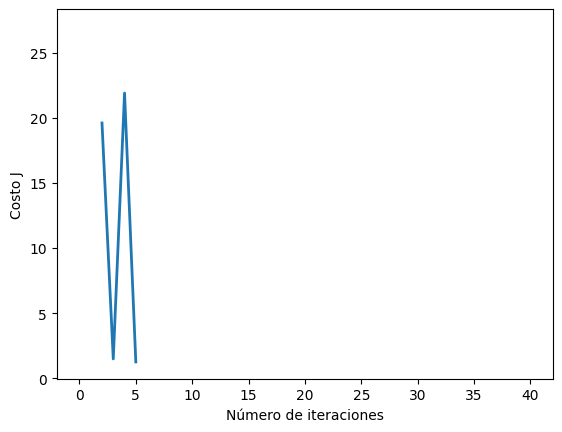

Theta calculado por el descenso por el gradiente: [-0.0007479  -0.11111621  0.01484048  0.0658817  -0.01138908  0.00041047
  0.00041913 -0.07386508 -0.030123   -0.03459541 -0.14600338  0.07504088
 -0.08599456 -0.05790928  0.01203971 -0.00078107  0.00109098 -0.02194236
  0.00226895  0.17856132  0.00170715  0.0017079 ]


In [95]:
import numpy as np
import matplotlib.pyplot as plt

def calcularCosto(theta, X, y, lambda_):
    m = y.size
    h = sigmoid(X.dot(theta))
    regularization_term = (lambda_ / (2 * m)) * np.sum(theta[1:]**2)
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + regularization_term
    return J

def descensoGradiente(theta, X, y, alpha, num_iters, lambda_):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        theta[0] = theta[0] - (alpha / m) * (h - y).dot(X[:, 0])
        theta[1:] = theta[1:] * (1 - alpha * lambda_ / m) - (alpha / m) * (h - y).dot(X[:, 1:])

        J_history.append(calcularCosto(theta, X, y, lambda_))

    return theta, J_history

# Define función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



# Elegir algunos valores para alpha y num_iters
alpha = 0.001
num_iters = 100
lambda_ = 0.1

# Inicializar theta y ejecutar el descenso por el gradiente
theta = np.zeros(X.shape[1])
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters, lambda_)

# Graficar la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.show()

# Mostrar los resultados del descenso por el gradiente
print('Theta calculado por el descenso por el gradiente:', theta)
